# SkyWatch EarthCache API Demonstration

### Configure working environment and pathnames

In [1]:
import os
import pandas as pd

In [2]:
# define repo name and get root working directory
repo = 'earthcache'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\earthcache'

In [3]:
# add repo source + notebooks directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )
sys.path.insert(0, os.path.join( root_path, 'notebooks' ) )

In [4]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\earthcache\\cfg'

### Create instance of client class and search criterion

In [5]:
# create instance of shclient class
from client import EcClient
client = EcClient( cfg_path, max_cost=10 )

In [6]:
# define geojson aoi collated with my house
aoi = { "type": "Polygon", 
        "coordinates": [ [ 
                            [ -2.665678, 51.201079 ], 
                            [ -2.657440, 51.201079 ], 
                            [ -2.657440, 51.211206 ], 
                            [ -2.665678, 51.211206 ], 
                            [ -2.665678, 51.201079 ] 
                            ] ] 
    }

In [7]:
# examine back-catalogues for 2019-2020
window = { 'start_date' : '2019-01-01', 'end_date' : '2020-12-31' }

### Identify medium resolution archived imagery satisfying spatiotemporal contraints

In [8]:
# first look for coincident medium resolution scenes
resolution = [ 'high' ]
status, result, search_id = client.processSearch(   aoi, 
                                                    window, 
                                                    resolution=resolution, 
                                                    coverage=30, 
                                                    delay=3 )
status, search_id

(200, 'd05eb783-67cd-4555-af80-c1e00fa0d589')

In [9]:
# encode json response into dataframe
search_df = pd.DataFrame( result[ 'data' ] )
search_df = search_df.sort_values( 'result_cloud_cover_percentage' )
search_df

,id,location,source,product_name,resolution,start_time,end_time,preview_uri,thumbnail_uri,location_coverage_percentage,area_sq_km,cost,result_cloud_cover_percentage,available_credit
1,255b95cb-764d-4523-8498-2f2df7c76df7,"{'type': 'Polygon', 'coordinates': [[[-2.89147...",Pleiades,DS_PHR1A_201901091125081_FR1_PX_W003N51_0403_0...,0.5,2019-01-09T11:25:08.000000+00:00,2019-01-09T11:25:08.000000+00:00,https://preview.airbus.terrastream.ca/airbus/p...,https://preview.airbus.terrastream.ca/airbus/p...,100.000000,0.647709,10.0,0,None
2,228ffa52-5312-4b3b-9227-c571dcbb80ab,"{'type': 'Polygon', 'coordinates': [[[-2.91271...",Pleiades,DS_PHR1A_202004211125354_FR1_PX_W003N51_0405_0...,0.5,2020-04-21T11:25:35.000000+00:00,2020-04-21T11:25:35.000000+00:00,https://preview.airbus.terrastream.ca/airbus/p...,https://preview.airbus.terrastream.ca/airbus/p...,100.000000,0.647709,10.0,0,None
0,6cb311d3-ce8e-4229-95a9-4f370f55de77,"{'coordinates': [[[-2.6604551003728587, 51.097...",SkySat,20200309_135431_ssc7_u0001,0.5,2020-03-09T13:54:31.812+00:00,2020-03-09T13:54:31.812+00:00,https://preview.skywatch.com/planet/skysat/202...,https://preview.skywatch.com/planet/skysat/202...,100.000000,0.647709,10.0,32,None
3,95662683-ecb9-4c22-a12c-ce21a0eff4c9,"{'type': 'Polygon', 'coordinates': [[[-2.65982...",Pleiades,DS_PHR1B_202008231120566_FR1_PX_W003N51_0703_0...,0.5,2020-08-23T11:20:56.000000+00:00,2020-08-23T11:20:56.000000+00:00,https://preview.airbus.terrastream.ca/airbus/p...,https://preview.airbus.terrastream.ca/airbus/p...,64.003572,0.414557,10.0,41,None


### Review and create pipeline configuration from archive search result

In [10]:
# get pipeline configuration
status, result = client.getPipelines()

In [11]:
# parse response into dataframe and print
pipeline_df = pd.DataFrame( result[ 'data'] )
pipeline_df

,id,name,start_date,end_date,aoi,area_km2,cloud_cover_percentage,min_aoi_coverage_percentage,interval,resolution_low,...,status,tags,result_delivery,created_at,updated_at,max_cost,status_reason,search_id,search_results,sources
0,797e496c-ff8f-4ba4-9f44-06bbb1941d8c,High Resolution Sample 2,2019-12-07,2019-12-21,"{'type': 'Polygon', 'coordinates': [[[-96.3607...",15.055335,100,80,30d,1.5,...,complete,"[{'label': 'Texas', 'value': 'Ranch'}, {'label...","{'max_latency': '0d', 'priorities': ['latest',...",2021-07-15T13:06:15.064537Z,2021-07-15T13:06:15Z,0.00,NaN,NaN,NaN,NaN
1,1956021b-3e9b-4738-a6c5-e6cb3198810c,Low Resolution Sample 2,2019-12-01,2019-12-30,"{'type': 'Polygon', 'coordinates': [[[-96.3607...",15.055335,100,80,30d,30.0,...,complete,"[{'label': 'Texas', 'value': 'Ranch'}, {'label...","{'max_latency': '0d', 'priorities': ['latest',...",2021-07-15T13:06:15.068833Z,2021-07-15T13:06:15Z,0.00,NaN,NaN,NaN,NaN
2,43c929d1-84a1-479d-a325-e79cd484024c,High Resolution Sample 1,2020-04-14,2020-04-14,"{'type': 'Polygon', 'coordinates': [[[130.8678...",24.133734,100,80,1d,30.0,...,complete,"[{'label': 'Kitakyushu', 'value': 'Japan'}, {'...","{'max_latency': '0d', 'priorities': ['latest',...",2021-07-15T13:06:15.103196Z,2021-07-15T13:06:15Z,0.00,NaN,NaN,NaN,NaN
3,6d455914-e571-11eb-afe5-dec683243585,test,2021-06-17,2021-08-18,"{'type': 'Polygon', 'coordinates': [[[-1.32997...",99.669509,100,80,30d,30.0,...,complete,[],"{'max_latency': '0d', 'priorities': ['first_av...",2021-07-15T13:34:49.169395Z,2021-07-15T13:34:49Z,0.00,"{'reason': 'some_results', 'description': 'Pip...",NaN,NaN,NaN
4,8eed0678-fc52-11eb-930f-82205f0f3175,,2020-03-27,2020-03-27,"{'type': 'Polygon', 'coordinates': [[[-2.65201...",0.591783,100,0,1d,1.5,...,complete,[],"{'max_latency': '0d', 'priorities': ['latest']}",2021-08-13T16:21:46.955508Z,2021-08-13T16:21:46Z,1.48,"{'reason': 'results', 'description': 'Pipeline...",7d13e723-bca5-4471-8259-c7cf856b5b77,[0761cf1a-51e9-423d-b0d9-705c048055d2],{'include': ['Spot']}
5,4b5d72e6-fc5f-11eb-b286-ba7825fbe697,wells_eye,2020-06-25,2020-06-25,"{'type': 'Polygon', 'coordinates': [[[-2.65567...",0.519803,100,0,1d,1.5,...,complete,"[{'label': 'string', 'value': 'string'}]","{'max_latency': '0d', 'priorities': ['latest']}",2021-08-13T17:52:56.927580Z,2021-08-13T17:52:56Z,1.30,"{'reason': 'results', 'description': 'Pipeline...",c3ed0a92-b119-46a2-b7a5-1b64f24e11ba,[b96c1a25-3a55-457d-90fc-6f290ae83ac4],{'include': ['Spot']}
6,ec50e51c-fea7-11eb-9f07-f6630fff0437,wells_big_brother,2019-04-02,2019-04-02,"{'type': 'Polygon', 'coordinates': [[[-2.66567...",0.647709,100,0,1d,1.5,...,complete,"[{'label': 'string', 'value': 'string'}]","{'max_latency': '0d', 'priorities': ['latest']}",2021-08-16T15:37:53.173533Z,2021-08-16T15:37:53Z,1.62,"{'reason': 'results', 'description': 'Pipeline...",f98f0353-21d2-4705-98c5-8332abd1aee7,[5003a8c5-3b6d-4a65-aabd-1703827a6625],{'include': ['Spot']}
7,412ebb80-feb3-11eb-a393-3a1cde9abae5,wells_skywatch,2019-07-04,2019-07-04,"{'type': 'Polygon', 'coordinates': [[[-2.66567...",0.647709,100,0,1d,1.5,...,complete,"[{'label': 'string', 'value': 'string'}]","{'max_latency': '0d', 'priorities': ['latest']}",2021-08-16T16:59:00.051344Z,2021-08-16T16:59:00Z,1.62,"{'reason': 'results', 'description': 'Pipeline...",5cfc4316-abaa-4145-9532-a63a44a3b547,[b9787b1b-30b1-4b46-b513-e16d65526b29],{'include': ['Spot']}


In [12]:
# get id of true colour image output
output_id = client.getOutputIdFromName( 'True Colour Image' )
output_id

'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b'

In [13]:
# get unique id for scene with least cloud contamination
search_results = search_df.iloc[ 0 ].id
search_results

'255b95cb-764d-4523-8498-2f2df7c76df7'

In [14]:
# create pipeline from search results
status, result = client.createPipelineFromSearch(   search_id, 
                                                    search_results, 
                                                    name='wells_skywatch_pleiades',
                                                    output={    "id": output_id,
                                                                "format": "geotiff",
                                                                "mosaic": "off"
                                                    }
                                            )


In [15]:
# response from server - status is pending
status, result

(201,
 {'data': {'id': '009ec630-0c93-11ec-bfd0-96b13152de61',
   'name': 'wells_skywatch_pleiades',
   'start_date': '2019-01-09',
   'end_date': '2019-01-09',
   'aoi': {'type': 'Polygon',
    'coordinates': [[[-2.665678, 51.201079],
      [-2.65744, 51.201079],
      [-2.65744, 51.211206],
      [-2.665678, 51.211206],
      [-2.665678, 51.201079]]]},
   'area_km2': 0.6477093060433632,
   'cloud_cover_percentage': 100,
   'min_aoi_coverage_percentage': 0,
   'interval': '1d',
   'resolution_low': 0.5,
   'resolution_high': 0.5,
   'output': {'id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'format': 'geotiff',
    'mosaic': 'off'},
   'status': 'pending',
   'tags': [{'label': 'string', 'value': 'string'}],
   'created_at': '2021-09-03T08:43:23.589754Z',
   'updated_at': '2021-09-03T08:43:23.589754Z',
   'max_cost': 10.0,
   'search_id': 'd05eb783-67cd-4555-af80-c1e00fa0d589',
   'search_results': ['255b95cb-764d-4523-8498-2f2df7c76df7'],
   'result_delivery': {'priorities': ['late

### Check pipeline created successfully and await delivery of images

In [16]:
# get pipeline id
pipeline_id = client.getPipelineIdFromName( 'wells_skywatch_pleiades')
pipeline_id

'009ec630-0c93-11ec-bfd0-96b13152de61'

In [17]:
# get status - its active !
status, result = client.getPipeline( pipeline_id )
status, result

(200,
 {'data': {'id': '009ec630-0c93-11ec-bfd0-96b13152de61',
   'name': 'wells_skywatch_pleiades',
   'start_date': '2019-01-09',
   'end_date': '2019-01-09',
   'aoi': {'type': 'Polygon',
    'coordinates': [[[-2.665678, 51.201079],
      [-2.65744, 51.201079],
      [-2.65744, 51.211206],
      [-2.665678, 51.211206],
      [-2.665678, 51.201079]]]},
   'area_km2': 0.6477093060433632,
   'cloud_cover_percentage': 100,
   'min_aoi_coverage_percentage': 0,
   'interval': '1d',
   'resolution_low': 0.5,
   'resolution_high': 0.5,
   'output': {'id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'format': 'geotiff',
    'mosaic': 'off'},
   'status': 'active',
   'tags': [{'label': 'string', 'value': 'string'}],
   'result_delivery': {'max_latency': '0d', 'priorities': ['latest']},
   'search_id': 'd05eb783-67cd-4555-af80-c1e00fa0d589',
   'search_results': ['255b95cb-764d-4523-8498-2f2df7c76df7'],
   'created_at': '2021-09-03T08:43:23.589754Z',
   'updated_at': '2021-09-03T08:43:23Z',
 

In [19]:
# get interval results - check status / message (retrieving...)
status, result = client.getIntervalResults( pipeline_id )
status, result

(200,
 {'data': [{'id': '6ffdf2c1-db78-4be7-8e48-ce4df5cc002b',
    'created_at': '2021-09-03T08:03:14.758597+0000',
    'updated_at': '2021-09-03T08:44:29.182350+0000',
    'pipeline_id': '009ec630-0c93-11ec-bfd0-96b13152de61',
    'output_id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'status': 'processing',
    'message': 'Retrieval - starting',
    'interval': {'start_date': '2019-01-09', 'end_date': '2019-01-09'},
    'total_interval_cost': None,
    'overall_metadata': {'scene_height': None,
     'scene_width': None,
     'filled_area_km2': None,
     'filled_area_percentage_of_aoi': None,
     'cloud_cover_percentage': None,
     'cloud_cover_percentage_of_aoi': None,
     'visible_area_km2': None,
     'visible_area_percentage': None,
     'visible_area_percentage_of_aoi': None},
    'results': [],
    'alternate_search_results': []}],
  'pagination': {'per_page': 2000,
   'cursor': {'next': None, 'self': '2021-09-03T08:44:29.182350+0000'}}})

In [20]:
# after 20 minutes, check status / message
status, result = client.getIntervalResults( pipeline_id )
status, result

(200,
 {'data': [{'id': '6ffdf2c1-db78-4be7-8e48-ce4df5cc002b',
    'created_at': '2021-09-03T08:03:14.758597+0000',
    'updated_at': '2021-09-03T09:22:41.083271+0000',
    'pipeline_id': '009ec630-0c93-11ec-bfd0-96b13152de61',
    'output_id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'status': 'complete',
    'message': 'Processing complete. 1 result available',
    'interval': {'start_date': '2019-01-09', 'end_date': '2019-01-09'},
    'total_interval_cost': 10.0,
    'overall_metadata': {'scene_height': 2252,
     'scene_width': 1145,
     'filled_area_km2': 0.64,
     'filled_area_percentage_of_aoi': 100.0,
     'cloud_cover_percentage': 0.0,
     'cloud_cover_percentage_of_aoi': 0.0,
     'visible_area_km2': 0.64,
     'visible_area_percentage': 100.0,
     'visible_area_percentage_of_aoi': 99.53},
    'results': [{'created_at': '2021-09-03T11:15:53.843035',
      'updated_at': '2021-09-03T09:22:41.083271+0000',
      'preview_url': 'https://s3-us-west-2.amazonaws.com/aoi-proc

### Download image datasets, load and visualise data

In [21]:
# download image and metadata
root_path = 'c:\\Users\\Chris.Williams\\Desktop\\earthcache-test'
images = []

# convert to dataframe
df = pd.DataFrame( result[ 'data' ] )
for row in df.itertuples():

    out_path = os.path.join( root_path, row.id )
    images.append( client.getImages( row.results, out_path ) )
images

... downloading https://s3-us-west-2.amazonaws.com/aoi-processed-images-prod/009ec630-0c93-11ec-bfd0-96b13152de61/d77cd062-ffd2-467c-a83f-20c3c00d052d/metadata/SKYWATCH_PHR_PS_20190109T1125_TC_Tile_0_0_P637Pk_metadata.json
100% [................................................................................] 8090 / 8090... downloading https://s3-us-west-2.amazonaws.com/aoi-processed-images-prod/009ec630-0c93-11ec-bfd0-96b13152de61/d77cd062-ffd2-467c-a83f-20c3c00d052d/analytic/SKYWATCH_PHR_PS_20190109T1125_TC_Tile_0_0_P637Pk.tif
100% [........................................................................] 30967412 / 30967412

[['c:\\Users\\Chris.Williams\\Desktop\\earthcache-test\\6ffdf2c1-db78-4be7-8e48-ce4df5cc002b\\20190109_112510/SKYWATCH_PHR_PS_20190109T1125_TC_Tile_0_0_P637Pk.tif']]

In [22]:
from osgeo import gdal
import matplotlib.pyplot as plt
  
ds = gdal.Open( images[ 0 ][ 0 ] )
data = ds.ReadAsArray()
data

array([[[0.10460301, 0.10071611, 0.08320621, ..., 0.05170741,
         0.04493889, 0.03945418],
        [0.08641055, 0.07145543, 0.06834972, ..., 0.04724355,
         0.04561766, 0.04299458],
        [0.0621147 , 0.05227792, 0.05347539, ..., 0.04050578,
         0.03942474, 0.03886114],
        ...,
        [0.0679178 , 0.08889829, 0.10038263, ..., 0.22742273,
         0.15375385, 0.0879115 ],
        [0.07648616, 0.07825429, 0.08391229, ..., 0.13824086,
         0.08576774, 0.06070291],
        [0.08021676, 0.07552633, 0.07444705, ..., 0.07814538,
         0.06503111, 0.06562475]],

       [[0.10977224, 0.10661541, 0.08992333, ..., 0.06468324,
         0.05648331, 0.05020452],
        [0.09204787, 0.07796213, 0.07525719, ..., 0.06040585,
         0.05724463, 0.05370739],
        [0.06848013, 0.05959544, 0.0610002 , ..., 0.05373242,
         0.05110335, 0.04955795],
        ...,
        [0.07921136, 0.09925617, 0.11020069, ..., 0.23240256,
         0.16341603, 0.10094482],
        [0.0

In [23]:
import numpy as np
np.amin( data[ 0, : , : ]), np.amax( data[ 0, : , : ] )

(-0.036705285, 1.1317562)

In [24]:
data.shape

(3, 2252, 1145)

In [27]:
# get stats
mean = np.mean( data )
std = np.std( data ) 
mean, std

(0.066116795, 0.037364796)

In [28]:
# clip to 95%
_min = mean-2*std; _max = mean+2*std
clip_data = np.clip( data, mean-2*std, mean+2*std )
_min, _max

(-0.008612796664237976, 0.140846386551857)

In [29]:
# compute normalised data
norm_data = ( clip_data - _min ) / ( _max - _min )

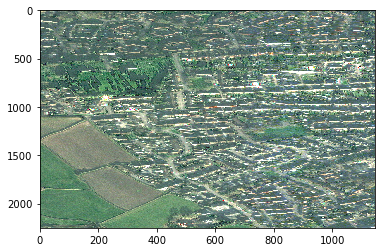

In [30]:
# show image
plt.imshow( norm_data.transpose( 1, 2, 0 ), interpolation='nearest', aspect='auto' )
plt.show()